## Read and plot audio file with Python

Install packages and download an audio file example.

In [ ]:
!pip install matplotlib
!pip install soundfile
!wget http://sabiod.lis-lab.fr/pub/challenges/Biosonar/audio_example.wav

There are many libraries to read audios file with Python. In this example, we present [Soundfile](https://pysoundfile.readthedocs.io/en/latest/) library.

In [15]:
import soundfile as sf
sig, sr = sf.read("audio_example.wav")
print("Signal size : %s"%sig.shape)
print("Sample rate: %s"%sr)


Signal size : 51200
Sample rate: 256000


The function takes the audio filename (path and name) in parameter and return 2 values: 
- The audio signal, if the file is in mono (one channel), the signal will be a vector with a dimension {number_of_sample} = {signal_duration} * {sampling_rate}. If the file is in stereo (two channels), the signal will be a matrix 2D [{number_of_sample},{number_of_channel}].
- Sampling rate

In this challenge, only mono files will be used. 
If needed, you can read only one part of the audio signal with arguments: "start" et "stop" in sf.read function.

To plot the signal :

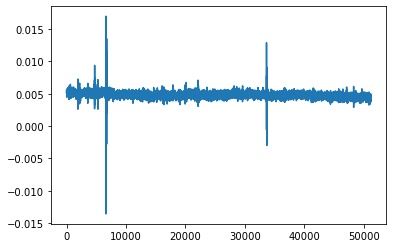

In [3]:
import matplotlib.pyplot as plt
plt.plot(sig)
plt.show()

The signal can be ploted as a spectrogram (time frequency representation).
This representation shown frequency of the signal.

In [ ]:
!pip install matplotlib
!pip install librosa

In [4]:
import librosa as lr
import librosa.display
import numpy as np

In [27]:
sig.shape[0]/2048 #temps du signal en seconde



25.0

In [35]:
tf_sig = lr.stft(sig, n_fft=2048) #n_fft = nombre de fit à prendre pour les fenêtres glissante 
#Pour n_fft=2048, le nombre de composants fréquentiels uniques est donc 2048/2 + 1 = 1025
tf_sig.shape

(1025, 101)

In [36]:
tf_sig = np.abs(tf_sig)
tf_sig.shape

(1025, 101)

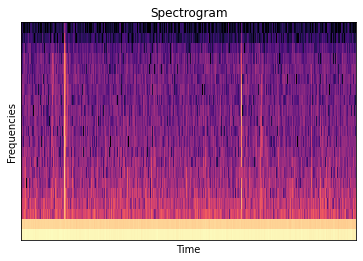

In [8]:
lr.display.specshow(lr.amplitude_to_db(tf_sig, ref=np.max))
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequencies")
plt.show()

In [42]:
tf_sig.mean(axis=1)

array([4.88326861e+00, 2.46531001e+00, 5.83643575e-02, ...,
       2.84278372e-04, 3.07473192e-04, 2.90791095e-04])